# SENTIMENTAL ANALYSIS of PM Modi's Remarks at G20 Summit on 'One Earth' at Bharat Mandapam, in Pragati Maidan, New Delhi on Sept 09 - 10, 2023

![PM's Remarks at G20 Summit](<PM's Remarks at G20 Summit.png>)

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings('ignore')

Loading data

In [17]:
file_path = "contents\Prime Minister's remarks.txt"

In [18]:
with open(file_path , 'r' , encoding = "utf-8") as file:
  speech_text = file.read()

NLP comes into the Picture

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Downloading the necessary batches

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\TANMAY SINGH
[nltk_data]     THAKUR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\TANMAY SINGH
[nltk_data]     THAKUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\TANMAY SINGH
[nltk_data]     THAKUR\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to C:\Users\TANMAY SINGH
[nltk_data]     THAKUR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Performing NLP operations

In [21]:
# Remove non-alphanumeric characters and whitespace from the speech text.
speech_text_cleaned = re.sub(r'[^\w\s]', '', speech_text)

# Convert the cleaned text to lowercase for consistency.
speech_text_cleaned = speech_text_cleaned.lower()

# Tokenize the cleaned text into words.
words = word_tokenize(speech_text_cleaned)

# Load the English stop words (common words that may not carry significant meaning).
stop_words = set(stopwords.words('english'))

# Filter out the stop words from the list of words to focus on meaningful content.
words_filtered = [word for word in words if word not in stop_words]


In [22]:
# Initialize a WordNet lemmatizer, which reduces words to their base or dictionary form.
lemmatizer = WordNetLemmatizer()

# Lemmatize the filtered words to convert them to their base forms.
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]


Getting  average sentiment

In [23]:
# Initialize the SentimentIntensityAnalyzer from the NLTK library.
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each lemmatized word and store them in a list.
sentiment_scores = [sia.polarity_scores(word)["compound"] for word in words_lemmatized]

# Calculate the average sentiment score by summing up all scores and dividing by the number of scores.
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)


In [24]:
print("The average sentiment is :" , average_sentiment)

The average sentiment is : 0.04182883613202077


EXTRACT POSITIVE NEGATIVE AND NEUTRAL

In [25]:
# Create a list of words with positive sentiment scores (score > 0.1).
positive_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] > 0.1]

# Create a list of words with negative sentiment scores (score < -0.1).
negative_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] < -0.1]

# Create a list of words with neutral sentiment scores (score between -0.1 and 0.1).
neutral_words = [word for i, word in enumerate(words_filtered) if -0.1 <= sentiment_scores[i] <= 0.1]


In [26]:
# Print the list of words with positive sentiment scores.
print('The positive words are:', positive_words)


The positive words are: ['excellencies', 'like', 'heartfelt', 'pray', 'well', 'ready', 'excellencies', 'extends', 'warm', 'welcome', 'happiness', 'solutions', 'friends', 'huge', 'trust', 'trust', 'trust', 'invites', 'trust', 'trust', 'confidence', 'ensuring', 'energy', 'security', 'solutions', 'friends', 'spirit', 'engaged', 'spirit', 'agree', 'consent', 'invite', 'friends', 'faith', 'respect', 'spirit', 'support', 'celebrating', 'security', 'spirit', 'launched', 'natural', 'protect', 'well', 'launched', 'boost', 'significant', 'creating', 'friends', 'energy', 'significant', 'energy', 'play', 'pleased', 'positive', 'willingness', 'fulfill', 'commitment', 'commitments', 'growth', 'friends', 'spirit', 'greater', 'good', 'stable', 'energy', 'security', 'invites', 'join', 'friends', 'credit', 'credit', 'positive', 'adequate', 'encouragement', 'positive', 'credit', 'promote', 'positive', 'credit', 'friends', 'success', 'beneficial', 'spirit', 'shared', 'invites', 'join', 'friends', 'warm', 

In [27]:
# Print the list of words with negative sentiment scores.
print('The negative words are:', negative_words)


The negative words are: ['affected', 'injured', 'difficult', 'demand', 'crisis', 'lack', 'conflict', 'deficit', 'crisis', 'deficit', 'terrorism', 'negative', 'lack', 'hard', 'sorrow', 'sad', 'pay', 'debt', 'crisis', 'crisis', 'crises', 'critical', 'disorders', 'cancer', 'problems', 'terrorism', 'exploiting', 'critical', 'fail', 'lose']


In [28]:
# Print the list of words with neutral sentiment scores.
print('The neutral words are:', neutral_words)


The neutral words are: ['prime', 'ministers', 'opening', 'remarks', 'g20', 'summit', 'september', '08', '2023', 'highnesses', 'namaskar', 'starting', 'formal', 'proceedings', 'behalf', 'us', 'would', 'express', 'condolences', 'people', 'earthquake', 'occurred', 'morocco', 'moment', 'ago', 'people', 'get', 'soon', 'entire', 'world', 'community', 'morocco', 'time', 'provide', 'possible', 'assistance', 'highnesses', 'president', 'g20', 'india', 'place', 'gathered', 'today', 'kilometers', 'away', 'stands', 'pillar', 'nearly', 'two', 'half', 'thousand', 'years', 'old', 'inscribed', 'pillar', 'prakrit', 'language', 'words', 'हवम', 'लकस', 'हतमख', 'त', 'अथ', 'इयम', 'नतस', 'हवम', 'meaning', 'welfare', 'humanity', 'always', 'ensured', 'two', 'half', 'thousand', 'years', 'ago', 'land', 'india', 'gave', 'message', 'entire', 'world', 'let', 'us', 'begin', 'g20', 'summit', 'remembering', 'message', '21st', 'century', 'time', 'potential', 'give', 'new', 'direction', 'entire', 'world', 'time', 'years'

The term "FreqDist" typically refers to the Frequency Distribution function in natural language processing and text analysis. It helps in counting and analyzing the frequency of each unique element in a dataset, such as words in a text corpus

In [29]:
# Create frequency distributions for positive, negative, and neutral words.
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)


In [30]:
# Print the frequency distribution of positive words.
print('The positive words frequency is:', word_freq_positive)


The positive words frequency is: <FreqDist with 103 samples and 218 outcomes>


In [31]:
# Print the frequency distribution of negative words.
print('The negative words frequency is:', word_freq_negative)


The negative words frequency is: <FreqDist with 23 samples and 30 outcomes>


In [32]:
# Print the frequency distribution of neutral words.
print('The neutral words frequency is:', word_freq_neutral)


The neutral words frequency is: <FreqDist with 723 samples and 1479 outcomes>


DATA VISUALISATION

The plt.subplot function is used to position each subplot in a grid layout, allowing us to compare the word frequencies across different sentiments.

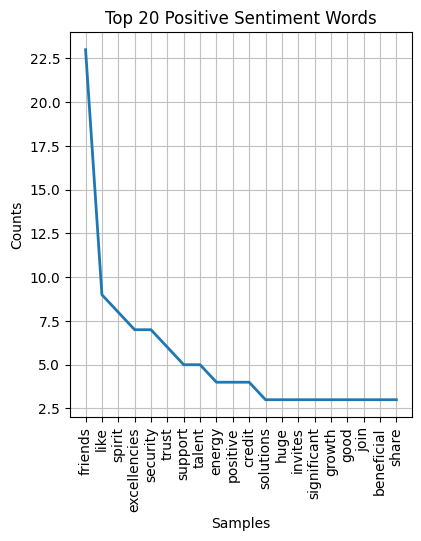

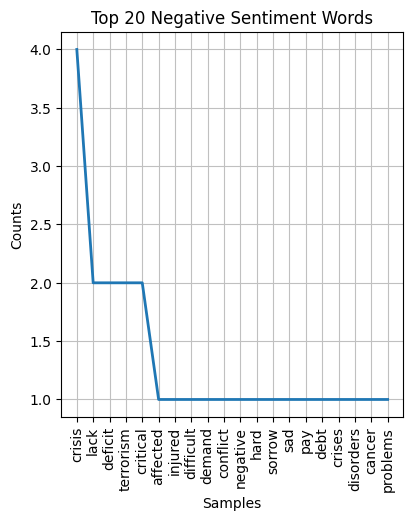

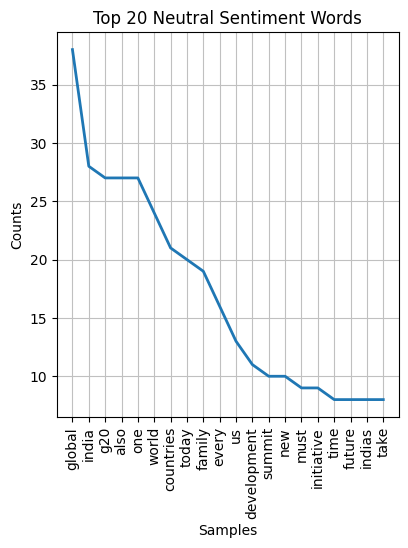

<Figure size 640x480 with 0 Axes>

In [33]:
# Create a new figure with a specific size (15 units in width, 5 units in height).
plt.figure(figsize=(15, 5))

# Create the first subplot positioned in the first column (1) of a 1x3 grid.
plt.subplot(131)

# Plot the top 20 most frequent positive sentiment words and set a title.
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")

# Create a new figure with the same size specification for the next subplot.
plt.figure(figsize=(15, 5))

# Create the second subplot positioned in the second column (2) of the same 1x3 grid.
plt.subplot(132)

# Plot the top 20 most frequent negative sentiment words and set a title.
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

# Create a new figure with the same size specification for the final subplot.
plt.figure(figsize=(15, 5))

# Create the third subplot positioned in the third column (3) of the same 1x3 grid.
plt.subplot(133)

# Plot the top 20 most frequent neutral sentiment words and set a title.
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

# Adjust the layout of subplots for better spacing.
plt.tight_layout()

# Display all subplots within the same figure.
plt.show()


Creating New Dataframes

In [34]:
# Create DataFrames for the top 20 most common positive sentiment words with columns 'Word' and 'Frequency'.
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])

# Create DataFrames for the top 20 most common negative sentiment words with columns 'Word' and 'Frequency'.
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])

# Create DataFrames for the top 20 most common neutral sentiment words with columns 'Word' and 'Frequency'.
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])


Plotting BAR GRaphs

In [35]:
# Create bar charts for the top 20 positive sentiment words with 'Word' on the x-axis and 'Frequency' on the y-axis.
fig_positive = px.bar(df_positive, x='Word', y='Frequency', title="Top 20 Positive Sentiment Words")

# Create bar charts for the top 20 negative sentiment words with 'Word' on the x-axis and 'Frequency' on the y-axis.
fig_negative = px.bar(df_negative, x='Word', y='Frequency', title="Top 20 Negative Sentiment Words")

# Create bar charts for the top 20 neutral sentiment words with 'Word' on the x-axis and 'Frequency' on the y-axis.
fig_neutral = px.bar(df_neutral, x='Word', y='Frequency', title="Top 20 Neutral Sentiment Words")

# Display the bar chart for the top 20 positive sentiment words.
fig_positive.show()

# Display the bar chart for the top 20 negative sentiment words.
fig_negative.show()

# Display the bar chart for the top 20 neutral sentiment words.
fig_neutral.show()


PLOTTING WORD CLOUDS

In [36]:
# Create word clouds for positive sentiment words with specific width, height, and background color.
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_positive)

# Create word clouds for negative sentiment words with specific width, height, and background color.
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_negative)

# Create word clouds for neutral sentiment words with specific width, height, and background color.
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_neutral)


Bilinear Interpolation:

Bilinear Interpolation is used to display the word clouds with a smoother and more visually appealing appearance. Bilinear interpolation is a method that calculates the values of pixels in an image by considering their surrounding pixel values. In this context, it helps in producing a smoother and more continuous visual representation of the word cloud images.

Bilinear interpolation works by considering the values of nearby pixels and using a weighted average to estimate the value of a pixel at a non-integer coordinate. This interpolation method helps in reducing pixelation and jagged edges in the displayed image, resulting in a more visually pleasing and accurate representation.

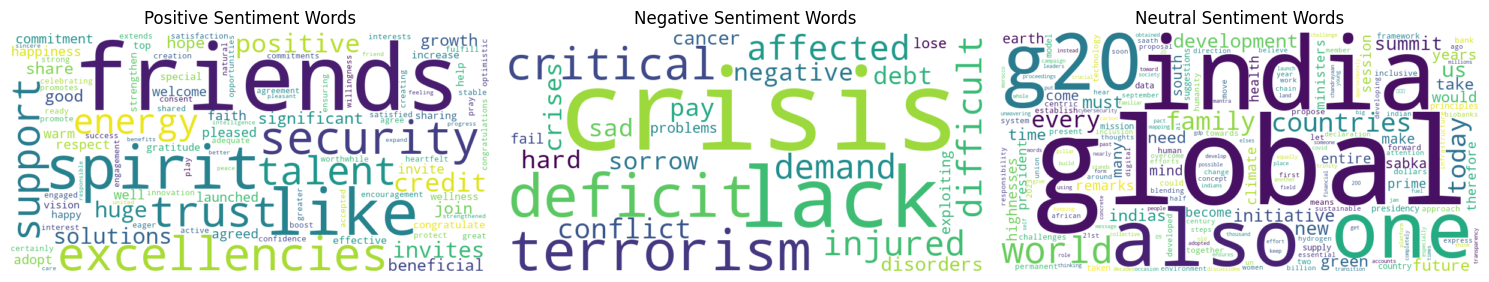

In [39]:
# Create a new figure with a specific size (15 units in width, 5 units in height).
plt.figure(figsize=(15, 5))


# Create the first subplot positioned in the first column (1) of a 1x3 grid.
plt.subplot(131)
# Display the word cloud for positive sentiment words using bilinear interpolation.
plt.imshow(wordcloud_positive, interpolation="bilinear")
# Turn off axis labels and ticks for a cleaner appearance.
plt.axis("off")
# Set the title for the first subplot.
plt.title("Positive Sentiment Words")



# Create the second subplot positioned in the second column (2) of the same 1x3 grid.
plt.subplot(132)
# Display the word cloud for negative sentiment words using bilinear interpolation.
plt.imshow(wordcloud_negative, interpolation="bilinear")
# Turn off axis labels and ticks.
plt.axis("off")
# Set the title for the second subplot.
plt.title("Negative Sentiment Words")



# Create the third subplot positioned in the third column (3) of the same 1x3 grid.
plt.subplot(133)
# Display the word cloud for neutral sentiment words using bilinear interpolation.
plt.imshow(wordcloud_neutral, interpolation="bilinear")
# Turn off axis labels and ticks.
plt.axis("off")
# Set the title for the third subplot.
plt.title("Neutral Sentiment Words")



# Adjust the layout of subplots for better spacing.
plt.tight_layout()
# Display all subplots within the same figure.
plt.show()


Individually Wordcloud

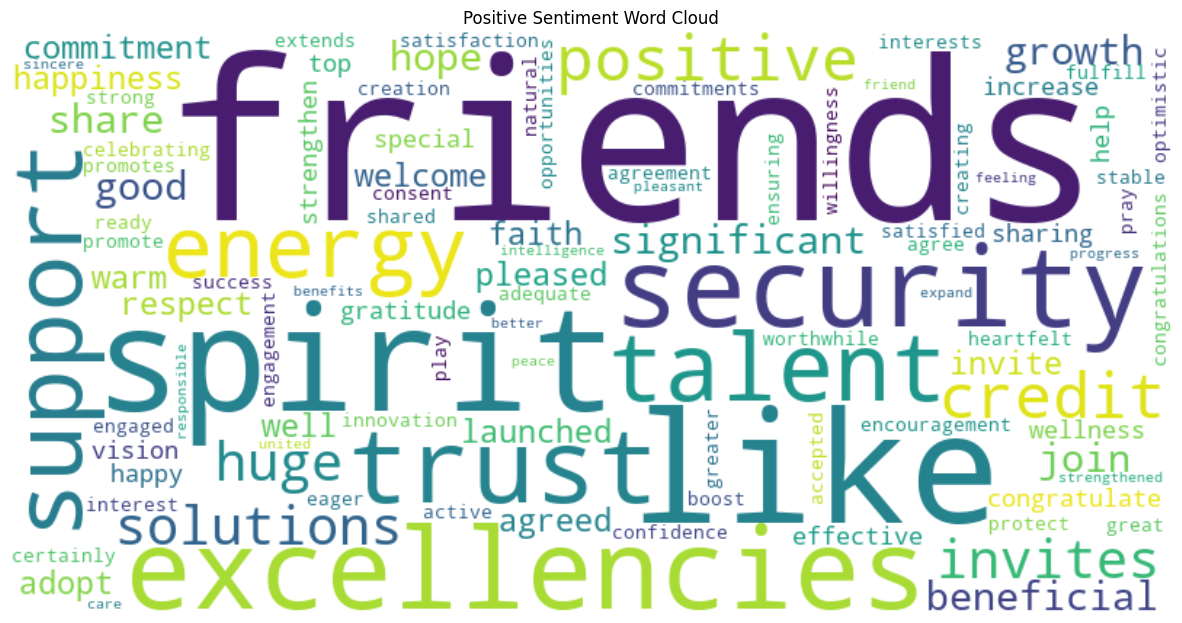

In [40]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")
plt.show()

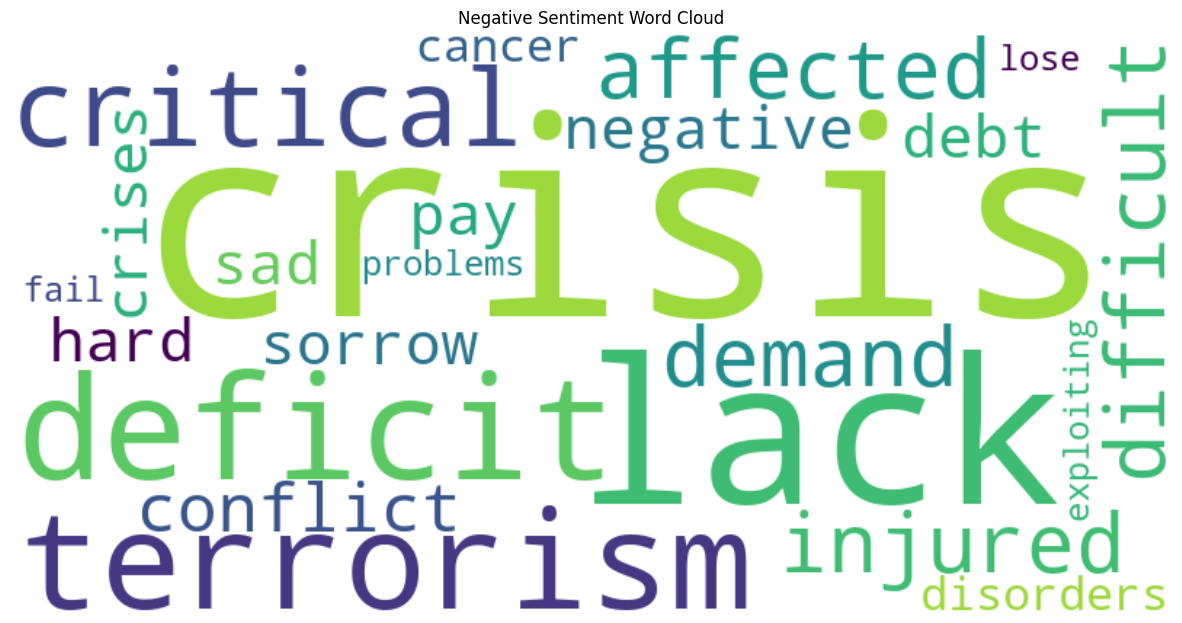

In [41]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")
plt.show()

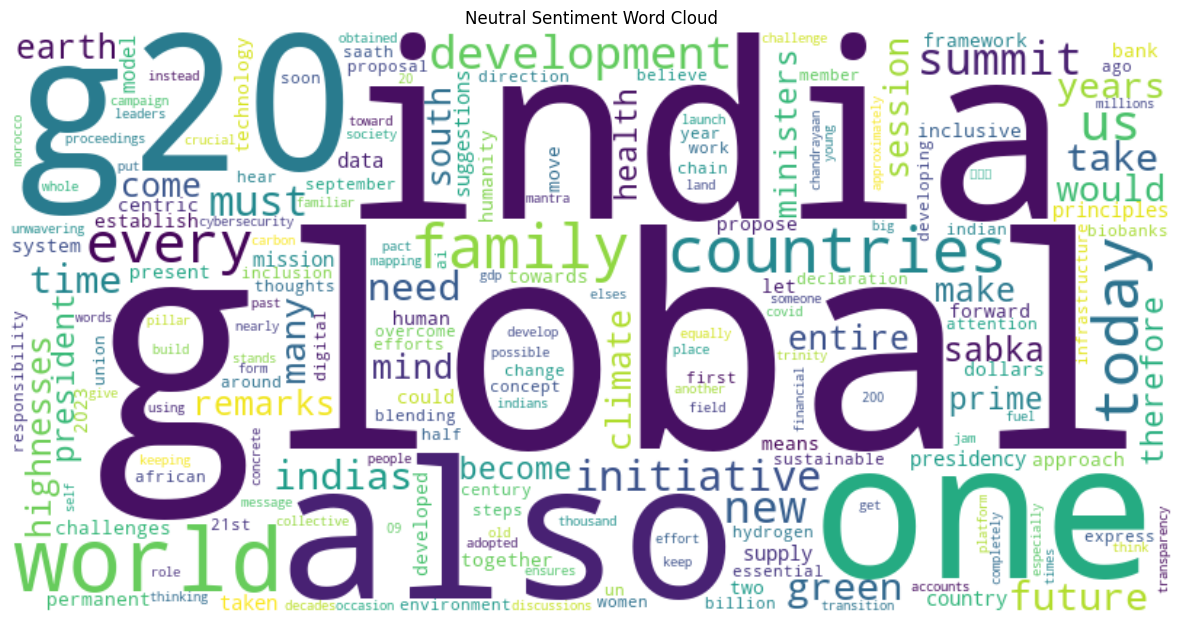

In [42]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")
plt.show()

In [43]:
# Create a frequency distribution of lemmatized words.
word_freq = nltk.FreqDist(words_lemmatized)

# Generate a word cloud from the frequency distribution with specific width, height, and background color.
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)


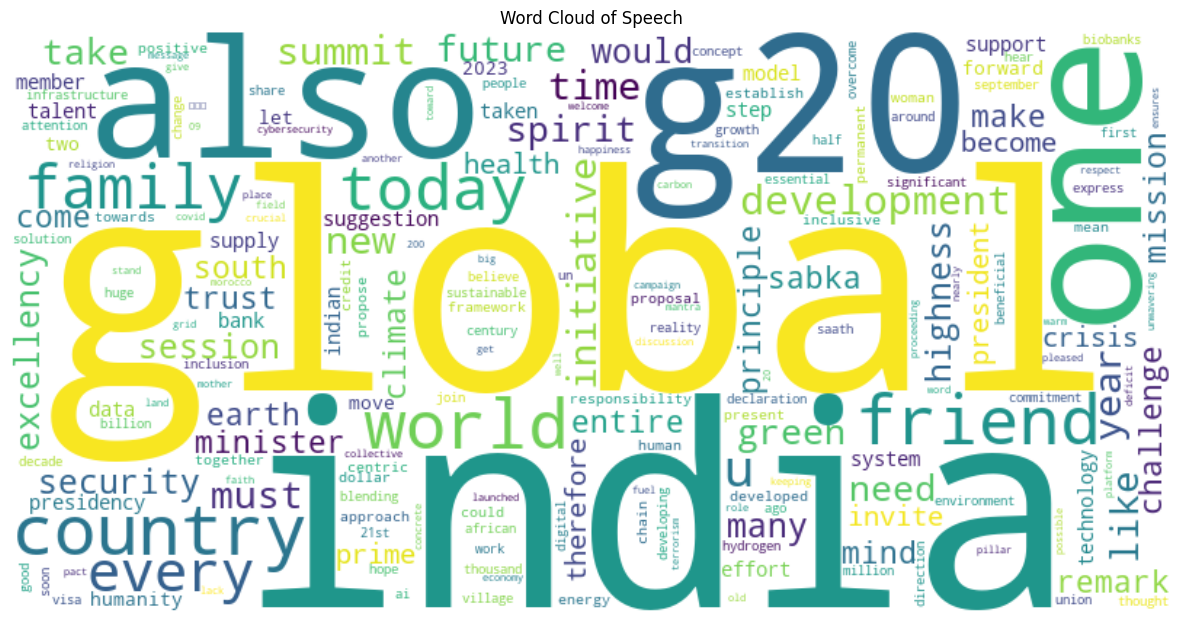

In [45]:
# Create and display a word cloud visualization of the lemmatized words from the speech, using bilinear interpolation for smoother visuals.
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Speech")
plt.show()

Percentage Summarization

In [46]:
total_words = len(words_filtered)
positive_percentage = (len(positive_words) / total_words) * 100
negative_percentage = (len(negative_words) / total_words) * 100
neutral_percentage = (len(neutral_words) / total_words) * 100

print("Positive Sentiment Percentage:", positive_percentage)
print("Negative Sentiment Percentage:", negative_percentage)
print("Neutral Sentiment Percentage:", neutral_percentage)

Positive Sentiment Percentage: 12.623045744064854
Negative Sentiment Percentage: 1.7371163867979156
Neutral Sentiment Percentage: 85.63983786913724


Creating new Data

In [47]:
data = {"Sentiment" : ['Positive' , 'Negative' , 'Neutral'] ,
        "Percentage" : [positive_percentage , negative_percentage , neutral_percentage]
        }

Dataframe

In [48]:
df_percentages = pd.DataFrame(data)

In [49]:
df_percentages

,Sentiment,Percentage
0,Positive,12.623046
1,Negative,1.737116
2,Neutral,85.639838


Plotting Overall Graph

In [51]:
fig = px.bar(df_percentages, x='Sentiment', y='Percentage', color='Sentiment',
             labels={'Sentiment': 'Sentiment Category', 'Percentage': 'Percentage (%)'},
             title='Percentage of Words in Each Sentiment Category')
fig.show()

Gensim

Gensim is an open-source natural language processing library in Python. 

It specializes in topic modeling, document similarity analysis, and other text processing tasks. Gensim provides tools for training and using word embeddings, such as Word2Vec, and is widely used for text analysis and machine learning applications.

Latent Dirichlet Allocation (LDA) models:

Latent Dirichlet Allocation (LDA) is a statistical model used for topic modeling in natural language processing. It assumes that documents are mixtures of topics, and topics are mixtures of words. LDA helps uncover hidden topic structures within a collection of documents and is widely applied in text analysis, document clustering, and recommendation systems.

In [53]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [54]:
# Create a dictionary from a list of preprocessed words (words_filtered).
dictionary = corpora.Dictionary([words_filtered])


In [55]:
# Create a corpus representation using the dictionary by converting the preprocessed words (words_filtered) into a bag-of-words format.
corpus = [dictionary.doc2bow(words_filtered)]


In [56]:
# Create an LDA (Latent Dirichlet Allocation) model by training it on the corpus.
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Extract and print the top words for each of the identified topics in the LDA model.
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.001*"global" + 0.001*"one" + 0.001*"india" + 0.001*"g20" + 0.001*"world"')
(1, '0.001*"global" + 0.001*"also" + 0.001*"one" + 0.001*"india" + 0.001*"friends"')
(2, '0.001*"india" + 0.001*"global" + 0.001*"also" + 0.001*"g20" + 0.001*"countries"')
(3, '0.020*"global" + 0.015*"india" + 0.014*"g20" + 0.014*"one" + 0.014*"also"')
(4, '0.001*"global" + 0.001*"also" + 0.001*"india" + 0.001*"one" + 0.001*"world"')


In [57]:
# Import the spaCy library and load the English language model.
import spacy
nlp = spacy.load("en_core_web_sm")

# Process the text using spaCy to identify named entities.
doc = nlp(speech_text)

# Extract and print the named entities along with their labels.
entities = [(ent.text, ent.label_) for ent in doc.ents]

for entity, label in entities:
    print(f"Entity: {entity}, Label: {label}")


Entity: September 08, 2023, Label: DATE
Entity: Excellencies, Label: ORG
Entity: Namaskar, Label: PERSON
Entity: Morocco, Label: GPE
Entity: a moment ago, Label: TIME
Entity: Morocco, Label: GPE
Entity: Excellencies, Label: ORG
Entity: G-20, Label: GPE
Entity: India, Label: GPE
Entity: today, Label: DATE
Entity: just a few kilometers, Label: TIME
Entity: nearly two and a half thousand years old, Label: CARDINAL
Entity: Prakrit, Label: GPE
Entity: लोकसा, Label: ORG
Entity: Two and a half thousand years ago, Label: DATE
Entity: India, Label: GPE
Entity: The 21st century, Label: DATE
Entity: years, Label: DATE
Entity: Centric, Label: PERSON
Entity: COVID, Label: ORG
Entity: Today, Label: DATE
Entity: G-20, Label: GPE
Entity: India, Label: GPE
Entity: first, Label: ORDINAL
Entity: Global Trust Deficit, Label: ORG
Entity: Sabka Saath, Label: PERSON
Entity: Sabka Vikas, Label: PERSON
Entity: Sabka Vishwas, Label: PERSON
Entity: Sabka Prayas', Label: ORG
Entity: East, Label: LOC
Entity: West,

KeyBERT is a Python library for keyword extraction and generation. It leverages transformer-based language models like BERT to automatically identify important keywords or phrases from text, aiding in summarization and content analysis tasks.

 These keywords in output are representative of the most important terms or phrases in the text, as determined by the KeyBERT model.

In [58]:
# Import the KeyBERT library for keyword extraction.
from keybert import KeyBERT

# Initialize the KeyBERT keyword extractor.
kw_extractor = KeyBERT()

# Extract keywords from the speech_text using the KeyBERT model.
keywords = kw_extractor.extract_keywords(speech_text)

# Iterate through the extracted keywords and print them.
for keyword in keywords:
    print(keyword[0])


pillar
mantra
summit
तम
minister


NRClex:

NRClex, short for National Research Council Emotion Lexicon, is a lexical resource that provides a comprehensive list of words and their associated emotions. It categorizes words based on emotions such as anger, joy, sadness, and fear, enabling sentiment analysis and emotion detection in text data. Researchers and analysts use NRClex to understand the emotional tone of written content and extract insights about sentiment and emotional context.

In [59]:
# Import the NRCLex library for emotion analysis.
from nrclex import NRCLex

# Initialize an NRCLex object with the cleaned speech text.
text_emotion = NRCLex(speech_text_cleaned)

# Calculate the frequency of various emotions in the text.
emotions = text_emotion.affect_frequencies

# Iterate through the emotions and their frequencies, then print them.
for emotion, frequency in emotions.items():
    print(f"Emotion: {emotion}, Frequency: {frequency}")


Emotion: fear, Frequency: 0.0359375
Emotion: anger, Frequency: 0.0265625
Emotion: anticip, Frequency: 0.0
Emotion: trust, Frequency: 0.203125
Emotion: surprise, Frequency: 0.04375
Emotion: positive, Frequency: 0.36875
Emotion: negative, Frequency: 0.05625
Emotion: sadness, Frequency: 0.0234375
Emotion: disgust, Frequency: 0.0109375
Emotion: joy, Frequency: 0.1125
Emotion: anticipation, Frequency: 0.11875


textstat 

Textstat is a Python library that helps analyze the readability and complexity of text. It provides functions to calculate readability scores, word and sentence counts, and other linguistic statistics. Textstat is useful for assessing the readability of documents, aiding in content creation, and tailoring text for specific audiences.

In [61]:
# Import the textstat library for text readability analysis.
import textstat

# Calculate the Flesch Reading Ease score for the cleaned speech text.
flesch_score = textstat.flesch_reading_ease(speech_text_cleaned)

# Calculate the Flesch-Kincaid Grade Level for the cleaned speech text.
flesch_grade = textstat.flesch_kincaid_grade(speech_text_cleaned)

# Calculate the SMOG Index for the cleaned speech text.
smog_index = textstat.smog_index(speech_text_cleaned)

# Print the calculated readability scores.
print(f"Flesch Reading Ease Score: {flesch_score}")
print(f"Flesch-Kincaid Grade Level: {flesch_grade}")
print(f"SMOG Index: {smog_index}")


Flesch Reading Ease Score: -3052.7
Flesch-Kincaid Grade Level: 1203.7
SMOG Index: 0.0


NLTK

NLTK (Natural Language Toolkit) is a Python library widely used for natural language processing and text analysis. It provides tools and resources for tasks like tokenization, stemming, tagging, parsing, and sentiment analysis. NLTK is valuable for researchers, developers, and educators working with text data, offering a comprehensive set of functionalities and linguistic resources.

Pointwise Mutual Information (PMI) is a measure used in natural language processing to assess the statistical association between two words in a text corpus. It quantifies how much more often two words co-occur together than if they were independent, indicating their degree of association or relevance in a specific context.

In [62]:
# Import necessary components from the NLTK library for bigram collocation analysis.
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Tokenize the cleaned speech text into words.
tokens = nltk.word_tokenize(speech_text_cleaned)

# Initialize BigramAssocMeasures to use Pointwise Mutual Information (PMI) as the scoring measure.
bigram_measures = BigramAssocMeasures()

# Create a BigramCollocationFinder to find bigram collocations from the tokenized words.
finder = BigramCollocationFinder.from_words(tokens)

# Score and rank bigram collocations based on PMI (Pointwise Mutual Information).
pmi_scores = finder.score_ngrams(bigram_measures.pmi)

# Print the top 10 bigram collocations along with their PMI scores.
for bigram, pmi in pmi_scores[:10]:
    print(f"Bigram: {bigram}, PMI: {pmi}")


Bigram: ('140', 'crore'), PMI: 11.588246152044817
Bigram: ('51', 'founding'), PMI: 11.588246152044817
Bigram: ('60', 'cities'), PMI: 11.588246152044817
Bigram: ('90', 'million'), PMI: 11.588246152044817
Bigram: ('aadhar', 'identity'), PMI: 11.588246152044817
Bigram: ('after', 'covid19'), PMI: 11.588246152044817
Bigram: ('ancient', 'vedas'), PMI: 11.588246152044817
Bigram: ('anemia', 'endocrine'), PMI: 11.588246152044817
Bigram: ('artificial', 'intelligence'), PMI: 11.588246152044817
Bigram: ('between', 'east'), PMI: 11.588246152044817
